In [1]:
import os
import sys
sys.path.append("/mnt/d/aspiranture/code/sat_image_segmentation")
import dataset_tool.dataset6_generator

In [2]:
import importlib

In [3]:
import dataset_6_binary_tree
importlib.reload(dataset_6_binary_tree)
import dataset_tool.binary_helper
importlib.reload(dataset_tool.binary_helper)

2024-05-15 16:12:23.477679: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-15 16:12:24.542524: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


<module 'dataset_tool.binary_helper' from '/mnt/d/aspiranture/code/sat_image_segmentation/dataset_tool/binary_helper.py'>

1. Import all needed libaries and setup categories binary tree for learning

In [4]:
categories = ["water", "forest", "fields", "city"]

Get combination of all possible binary trees

In [5]:
possible_trees = dataset_tool.binary_helper.return_possible_trees(categories)

In [6]:
possible_trees

[['water', ['forest', ['fields', 'city']]],
 ['water', ['forest', ['city', 'fields']]],
 ['water', ['fields', ['forest', 'city']]],
 ['water', ['fields', ['city', 'forest']]],
 ['water', ['city', ['forest', 'fields']]],
 ['water', ['city', ['fields', 'forest']]],
 ['forest', ['water', ['fields', 'city']]],
 ['forest', ['water', ['city', 'fields']]],
 ['forest', ['fields', ['water', 'city']]],
 ['forest', ['fields', ['city', 'water']]],
 ['forest', ['city', ['water', 'fields']]],
 ['forest', ['city', ['fields', 'water']]],
 ['fields', ['water', ['forest', 'city']]],
 ['fields', ['water', ['city', 'forest']]],
 ['fields', ['forest', ['water', 'city']]],
 ['fields', ['forest', ['city', 'water']]],
 ['fields', ['city', ['water', 'forest']]],
 ['fields', ['city', ['forest', 'water']]],
 ['city', ['water', ['forest', 'fields']]],
 ['city', ['water', ['fields', 'forest']]],
 ['city', ['forest', ['water', 'fields']]],
 ['city', ['forest', ['fields', 'water']]],
 ['city', ['fields', ['water', '

In [7]:
categories_tree_1 = ["water",["forest",["fields", "city"]]]

In [8]:
odd_indexes = [element for i, element in enumerate(possible_trees) if i % 2 != 0]

**We should also decrease the number of variations up to 2 times, because the last iteration will be the same**

In [9]:
odd_indexes

[['water', ['forest', ['city', 'fields']]],
 ['water', ['fields', ['city', 'forest']]],
 ['water', ['city', ['fields', 'forest']]],
 ['forest', ['water', ['city', 'fields']]],
 ['forest', ['fields', ['city', 'water']]],
 ['forest', ['city', ['fields', 'water']]],
 ['fields', ['water', ['city', 'forest']]],
 ['fields', ['forest', ['city', 'water']]],
 ['fields', ['city', ['forest', 'water']]],
 ['city', ['water', ['fields', 'forest']]],
 ['city', ['forest', ['fields', 'water']]],
 ['city', ['fields', ['forest', 'water']]]]

## 2. Load and initialize dataset

In [36]:
ds = dataset_6_binary_tree.Dataset6BinaryTree(categories_tree_1)

In [37]:
ds.initialize()

Error read []
len 27


Recheck if only supported categories has been included

In [38]:
ds.get_supported_categories()

['water', 'forest', 'fields', 'city']

In [39]:
ds.supported_categories_map

3. Create binary models 

In [40]:
ds.create_models()

Entering into iteration 1
Iteration 1 creating new arrays
Iteration 1 calcualte weights
Entering into iteration 2
Iteration 2 creating new arrays
Iteration 2 calcualte weights
Entering into iteration 3
Iteration 3 creating new arrays
Iteration 3 calcualte weights


In [41]:
validation_dataset = ds.load_custom_verification_dataset("/mnt/d/shared_folder/test_images2_fixed/")

len 3


## <span style="color:orange">**Get accuracy result from another pictures, which is not splitted with current dataset**</span> 

In [42]:
import numpy as np

In [43]:
## create predictions for validation dataset
custom_validation_y = []
custom_validation_x = []
for key, value in validation_dataset.items():
    catogory_number = ds.supported_categories_map[key]
    y_data_custom = np.full(value.shape[1], catogory_number)
    custom_validation_y.extend(y_data_custom)
    custom_validation_x.append(value)

In [44]:
custom_validation_y_np = np.asarray(custom_validation_y)
custom_validation_x_1 = np.hstack(custom_validation_x)
custom_validation_x_np = np.moveaxis(custom_validation_x_1, 0, 1)

In [45]:
custom_validation_prediction = ds.predict_custom_validation_data(custom_validation_x_np)

114/114 [==============================] - 1s 3ms/step


In [46]:
from sklearn.metrics import accuracy_score, classification_report

In [47]:
accuracy_score(custom_validation_prediction[-1], custom_validation_y_np)

0.9422724217978136

<span style="color: orange"><i>As we see the custom validation data has the same accuracy as data separated from test</i></span>

In [48]:
classification_report(custom_validation_prediction[-1], custom_validation_y_np, output_dict=True)

{'1': {'precision': 0.9958531061487989,
  'recall': 0.9927549626058502,
  'f1-score': 0.9943016210074997,
  'support': 1184811.0},
 '2': {'precision': 0.9348347247292419,
  'recall': 0.8575586660112287,
  'f1-score': 0.8945308810233851,
  'support': 77302.0},
 '3': {'precision': 0.6783235944080104,
  'recall': 0.8815051050028253,
  'f1-score': 0.7666812535765982,
  'support': 129187.0},
 '4': {'precision': 0.6931026098233101,
  'recall': 0.4998538695347206,
  'f1-score': 0.5808259186307139,
  'support': 102648.0},
 'accuracy': 0.9422724217978136,
 'macro avg': {'precision': 0.8255285087773404,
  'recall': 0.8079181507886561,
  'f1-score': 0.8090849185595492,
  'support': 1493948.0},
 'weighted avg': {'precision': 0.9444361485970161,
  'recall': 0.9422724217978136,
  'f1-score': 0.9410464045962725,
  'support': 1493948.0}}

5. Make validation wit a test data which not icnluded to train sample But htis data **<span style="color: red">has been splited from original dataset</span>**

In [49]:
results = ds.validate_with_test_data()

792/792 [==============================] - 3s 4ms/step
Binary acccucary for step 1 is 99.39%.
Calcaluting accuracy for 2 categories
Adding idxes for category 1: [      0       6       7 ... 1620628 1620629 1620630]
Total acccucary for step 1 is 99.39%.
306/306 [==============================] - 1s 4ms/step
Binary acccucary for step 2 is 97.2%.
Calcaluting accuracy for 3 categories
Adding idxes for category 2: [      1       4       9 ... 1620610 1620612 1620620]
Total acccucary for step 2 is 98.35000000000001%.
194/194 [==============================] - 1s 3ms/step
Binary acccucary for step 3 is 81.86%.
Calcaluting accuracy for 4 categories
Adding idxes for category 3: [      5      18      21 ... 1620616 1620619 1620623]
Total acccucary for step 3 is 94.01%.


In [54]:
def generate_data_for_binary_hystograms(data):
    lst = []
    for indx, itm in enumerate(data):
        if (indx +1 == len(data)):
            lst.append(itm.binary_predictions[:, 0])
            lst.append(itm.binary_predictions[:, 1])
        else:
            lst.append(itm.binary_predictions[:, 0])
    return lst

In [55]:
results[0]

In [56]:
generated_hysts = generate_data_for_binary_hystograms(results)

In [57]:
len(generated_hysts)

4

In [58]:
import matplotlib.pyplot as plt
import numpy as np

In [59]:
def createHistGraph(probalities, categories_map):
    """
    Creates histgram for propalities
    :param probalities: probabilites list
    :param categories_map: legend map to transform numbers to human-readable categories
    :return: None
    """
    fig, axs = plt.subplots(len(probalities))

    for category in range(len(probalities)):
        col = (np.random.random(), np.random.random(), np.random.random())
        axs[category].hist(probalities[category], color=col, range=(1/len(probalities), 1.01), label=list(categories_map.keys())[category])
        axs[category].legend()

### Hystogram of ierachical binary classier

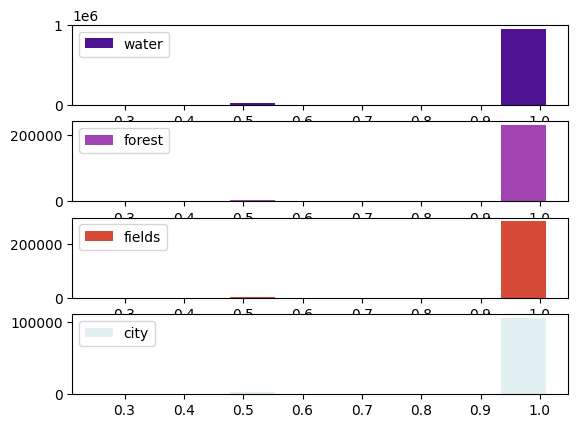

In [60]:
createHistGraph(generated_hysts, ds.supported_categories_map)

In [69]:
r_c = [len(custom_validation_y_np[custom_validation_y_np == i]) for i in range(1,5)]

In [70]:
p_c = [len(custom_validation_prediction[-1][custom_validation_prediction[-1] == i]) for i in range(1,5)]

In [72]:
a_diff = abs(np.array(r_c) - np.array(p_c))

In [73]:
a_diff

array([ 3686,  6390, 38696, 28620])

In [74]:
categories

['water', 'forest', 'fields', 'city']

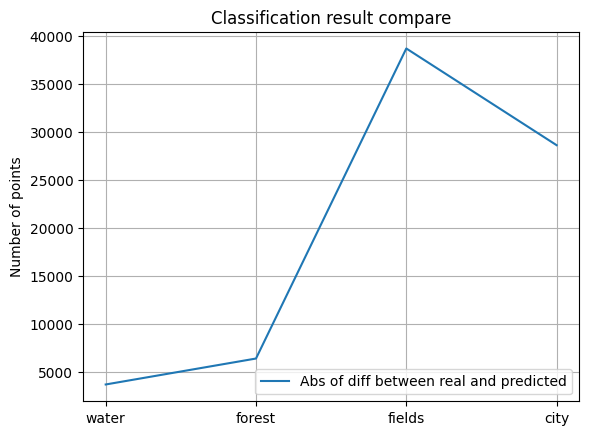

In [84]:
x = np.arange(len(categories))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
line = ax.plot([0,1,2,3], a_diff, label='Abs of diff between real and predicted')
#rects1 = ax.bar(x - width/2, a_diff, width, label='Difference')
# rects2 = ax.bar(x + width/2, gnb_values, width, label='NB values')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of points')
ax.set_title('Classification result compare')
ax.set_xticks(x)
plt.grid()
ax.set_xticklabels(categories)
ax.legend()

In [62]:
custom_validation_y_np

array([1, 1, 1, ..., 4, 4, 4])

### Check for all possible binary trees to check the best accuracy on it

This part of file check for each possible binary trees categories layout and then makes a table with accuracy for each category to check which layout is the best

In [36]:
models = []

In [ ]:
for tree in odd_indexes:
    print(f"do for iteration: {tree}")
    ds_i = dataset_6_binary_tree.Dataset6BinaryTree(tree)
    ds_i.initialize()
    ds_i.get_supported_categories()
    ds_i.create_models()
    pred = ds_i.validate_with_test_data()
    models.append((ds_i, pred))

do for iteration: ['water', ['forest', ['city', 'fields']]]
Error read []
len 27
Entering into iteration 1
Iteration 1 creating new arrays
Iteration 1 calcualte weights
Entering into iteration 2
Iteration 2 creating new arrays
Iteration 2 calcualte weights
Entering into iteration 3
Iteration 3 creating new arrays
Iteration 3 calcualte weights
792/792 [==============================] - 3s 3ms/step
Binary acccucary for step 1 is 99.4%.
Calcaluting accuracy for 2 categories
Adding idxes for category 1: [      0       1       5 ... 1620626 1620628 1620629]
Total acccucary for step 1 is 99.4%.
306/306 [==============================] - 1s 3ms/step
Binary acccucary for step 2 is 97.13000000000001%.
Calcaluting accuracy for 3 categories
Adding idxes for category 2: [      2       3       6 ... 1620604 1620611 1620614]
Total acccucary for step 2 is 98.33%.
194/194 [==============================] - 1s 3ms/step
Binary acccucary for step 3 is 81.67%.
Calcaluting accuracy for 4 categories
Adding 

In [ ]:
from sklearn.metrics import  accuracy_score, classification_report
import numpy as np

In [78]:
prediction_data_report = []

for model in models:
    last_predictions = model[1][-1]
    supported_categories = model[0].get_supported_categories()
    print(f"Supported categories: {supported_categories}")
    current_categories_map = model[0].supported_categories_map
    print(f"Current categories map: {current_categories_map}")
    acc_map = {}
    acc_score_total = accuracy_score(last_predictions.array_of_categories, last_predictions.y_test)
    acc_map["total"] = acc_score_total
    print(f"Accuracy score: {acc_score_total}")
    classification_rep = classification_report(last_predictions.array_of_categories, last_predictions.y_test, output_dict=True)
    #prediction_data_report.append(classification_rep)
    # create precision map for each category and total
    
    for category_idx in range(len(supported_categories)):
        current_category_value = list(current_categories_map.values())[category_idx]
        current_category_key = list(current_categories_map.keys())[category_idx]
        acc_score_for_category = classification_rep[f"{current_category_value}"]['precision']
        ## round num to .00 and multiply it to 100
        acc_score_for_category = round(acc_score_for_category, 2) * 100
        acc_map[current_category_key] = acc_score_for_category
    
    prediction_data_report.append(acc_map)
    

Supported categories: ['water', 'forest', 'city', 'fields']
Current categories map: {'water': 1, 'forest': 2, 'city': 3, 'fields': 4}
Accuracy score: 0.9398036937464481
Supported categories: ['water', 'fields', 'city', 'forest']
Current categories map: {'water': 1, 'fields': 2, 'city': 3, 'forest': 4}
Accuracy score: 0.9394717242851705
Supported categories: ['water', 'city', 'fields', 'forest']
Current categories map: {'water': 1, 'city': 2, 'fields': 3, 'forest': 4}
Accuracy score: 0.9396222829256012
Supported categories: ['forest', 'water', 'city', 'fields']
Current categories map: {'forest': 1, 'water': 2, 'city': 3, 'fields': 4}
Accuracy score: 0.9394137221859881
Supported categories: ['forest', 'fields', 'city', 'water']
Current categories map: {'forest': 1, 'fields': 2, 'city': 3, 'water': 4}
Accuracy score: 0.9397253292081912
Supported categories: ['forest', 'city', 'fields', 'water']
Current categories map: {'forest': 1, 'city': 2, 'fields': 3, 'water': 4}
Accuracy score: 0.939

In [81]:
prediction_data_report_np = np.asarray(prediction_data_report)

In [97]:
colums_map = {}
for sup_category in prediction_data_report[0].keys():
    category_values = [s[sup_category] for s in prediction_data_report]
    colums_map[sup_category] = category_values

In [84]:
import pandas as pd

In [99]:
data_frame = pd.DataFrame(colums_map)

In [91]:
data_frame_indexes = [",".join(s[0].get_supported_categories()) for s in models]

In [92]:
#data_frame_indexes

['water,forest,city,fields',
 'water,fields,city,forest',
 'water,city,fields,forest',
 'forest,water,city,fields',
 'forest,fields,city,water',
 'forest,city,fields,water',
 'fields,water,city,forest',
 'fields,forest,city,water',
 'fields,city,forest,water',
 'city,water,fields,forest',
 'city,forest,fields,water',
 'city,fields,forest,water']

In [101]:
data_frame.index = data_frame_indexes

In [102]:
data_frame

,total,water,forest,city,fields
"water,forest,city,fields",0.939804,100.0,96.0,83.0,64.0
"water,fields,city,forest",0.939472,100.0,64.0,83.0,96.0
"water,city,fields,forest",0.939622,100.0,64.0,96.0,83.0
"forest,water,city,fields",0.939414,96.0,100.0,83.0,64.0
"forest,fields,city,water",0.939725,64.0,100.0,83.0,96.0
"forest,city,fields,water",0.939768,64.0,100.0,96.0,83.0
"fields,water,city,forest",0.939698,96.0,64.0,83.0,100.0
"fields,forest,city,water",0.939729,64.0,96.0,83.0,100.0
"fields,city,forest,water",0.939997,65.0,83.0,96.0,100.0
"city,water,fields,forest",0.939554,96.0,64.0,100.0,83.0


## Use multicategorial classifier

In [92]:
import tensorflow as tf

In [93]:
from sklearn.metrics import accuracy_score, classification_report

In [94]:
from tensorflow.keras.layers import *
import layers.naive_bayes
importlib.reload(layers.naive_bayes)
import tensorflow as tf
# from keras.models import Model, save_model
# from keras.layers import Input

# Create the model
# model_new_1 = tf.keras.models.Sequential()
# model_new_1.add(tf.keras.models.InputLayer(shape=(12,)))  # Input layer
# model_new_1.add(layers.naive_bayes.MultiClassNaiveBayesLayer(num_features=12, num_of_categories=7))  # Naive Bayes layer
# model_new_1.add(tf.keras.models.Softmax())  #

model_new_gnb = tf.keras.models.Sequential([
    layers.naive_bayes.MultiClassNaiveBayesLayer(num_features=12, num_of_categories=4, input_shape=(12,)),
    Activation("softmax")
    ])


In [95]:
model_new_gnb.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy','mse'])
model_new_gnb.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 multi_class_naive_bayes_la  (None, 4)                 96        
 yer_6 (MultiClassNaiveBaye                                      
 sLayer)                                                         
                                                                 
 activation_6 (Activation)   (None, 4)                 0         
                                                                 
Total params: 96 (384.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 96 (384.00 Byte)
_________________________________________________________________


In [96]:
import numpy as np

Crop dataset and transform it to use only 4 categories. Remap labels to fit binary dataset

In [97]:
y_int_labels = ds.y_train_new.copy()
y_int_labels = y_int_labels-1
means = []
variances = []

num_classes = 4  # or however many you have

for i in range(num_classes):
    means.append(np.mean(ds.x_train_new[y_int_labels == i], axis=0))
    variances.append(np.var(ds.x_train_new[y_int_labels == i], axis=0))

means = np.array(means)
variances = np.array(variances)

In [98]:
model_new_gnb.layers[0].set_weights([means, variances])

In [99]:
pred_res = model_new_gnb.predict(ds.x_test_new, batch_size=2048)

792/792 [==============================] - 4s 5ms/step


In [100]:
predd = []

for iii in range(pred_res.shape[1]):
    predd.append(pred_res[:, iii])

### Hystogram of multiclass classier

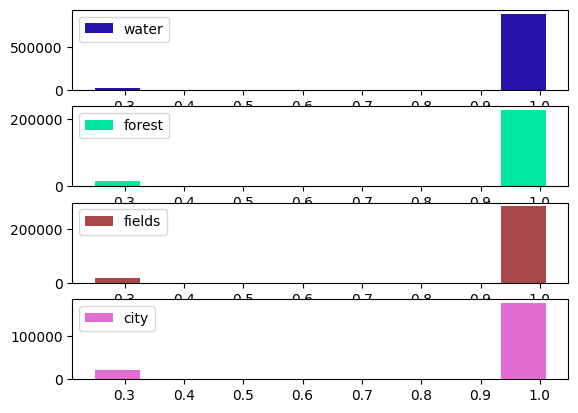

In [101]:
createHistGraph(predd, ds.supported_categories_map)

In [102]:
pred_res_vec = tf.argmax(pred_res, axis=-1).numpy()

In [103]:
pred_res_vec = pred_res_vec + 1

Detect accuacy for multiclass classifier

In [104]:
accuracy_score(pred_res_vec, ds.y_test_new)

0.8969703775874952

In [105]:
classification_report(pred_res_vec, ds.y_test_new, output_dict=True)

{'1': {'precision': 0.9274154185391527,
  'recall': 0.9915466205389893,
  'f1-score': 0.9584093956647604,
  'support': 925547.0},
 '2': {'precision': 0.9534646015197185,
  'recall': 0.9640056816932502,
  'f1-score': 0.9587061673970279,
  'support': 227397.0},
 '3': {'precision': 0.825229184462135,
  'recall': 0.9110483215076983,
  'f1-score': 0.8660178580652041,
  'support': 285256.0},
 '4': {'precision': 0.6590260869565218,
  'recall': 0.3115753353322626,
  'f1-score': 0.42311142209534724,
  'support': 182431.0},
 'accuracy': 0.8969703775874952,
 'macro avg': {'precision': 0.841283822869382,
  'recall': 0.7945439897680502,
  'f1-score': 0.8015612108055848,
  'support': 1620631.0},
 'weighted avg': {'precision': 0.8828721113485628,
  'recall': 0.8969703775874952,
  'f1-score': 0.8819313447918977,
  'support': 1620631.0}}

In [85]:
r_c_m = [len(ds.y_test_new[ds.y_test_new == i]) for i in range(1,5)]

In [106]:
r_c_p = [len(pred_res_vec[pred_res_vec == i]) for i in range(1,5)]

In [108]:
a_diff_p = abs(np.array(r_c_m) - np.array(r_c_p))

In [110]:
a_diff_p

array([64002,  2514, 29665, 96181])

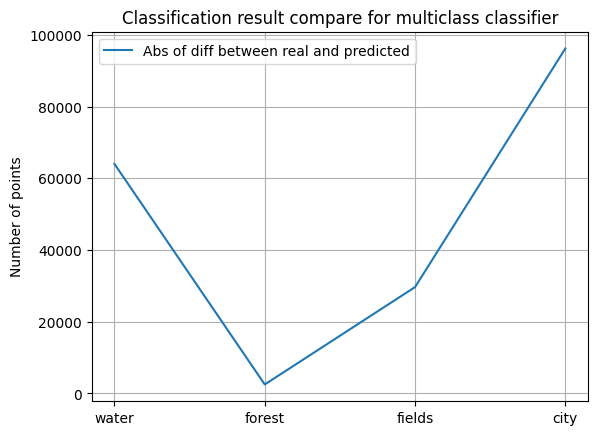

In [109]:
x = np.arange(len(categories))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
line = ax.plot([0,1,2,3], a_diff_p, label='Abs of diff between real and predicted')
#rects1 = ax.bar(x - width/2, a_diff, width, label='Difference')
# rects2 = ax.bar(x + width/2, gnb_values, width, label='NB values')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of points')
ax.set_title('Classification result compare for multiclass classifier')
ax.set_xticks(x)
plt.grid()
ax.set_xticklabels(categories)
ax.legend()

## Load image and display how it works on it

In [109]:
image_1 = ds.load_image("/mnt/d/shared_folder/test_images2/*B?*.tiff")

In [110]:
image_1.shape

(733, 1250, 12)

### Binary

In [112]:
image_1_p, image_1_i = ds.predict_image(image_1)

448/448 [==============================] - 1s 3ms/step
Adding idxes for category 1: [   670    671    672 ... 916247 916248 916249]
236/236 [==============================] - 1s 3ms/step
Adding idxes for category 2: [     0      3     71 ... 915308 915328 915329]
218/218 [==============================] - 1s 3ms/step
Adding idxes for category 3: [    41     73    132 ... 915225 915291 915292]


In [113]:
image_1_i[-1].shape

(916250,)

In [114]:
image_to_display = image_1_i[-1].reshape(733,1250)

In [115]:
image_to_display.min()

1

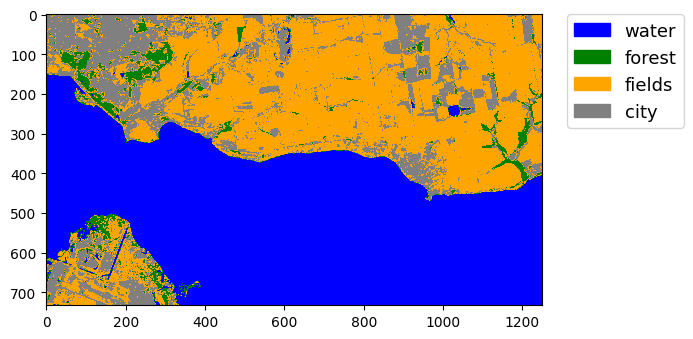

In [116]:
from matplotlib.colors import ListedColormap
import earthpy.plot as ep
import matplotlib.pyplot as plt

im = plt.imshow(image_to_display,
           vmin=1,vmax=6,
               cmap=ListedColormap(['blue', 'green', 'orange', 'grey', 'yellow','brown']))
ep.draw_legend(im_ax = im, titles = ["water","forest","fields","city"])


plt.show()

## Multiclass

In [117]:
image_1_vector = image_1.reshape(image_1.shape[0]*image_1.shape[1],12)

In [118]:
image_1_multi = model_new_gnb.predict(image_1_vector, batch_size=2048)

448/448 [==============================] - 2s 3ms/step


In [119]:
image_1_multi_preds = tf.argmax(image_1_multi, axis=-1).numpy()

In [120]:
image_1_multi_preds_img = image_1_multi_preds.reshape(733,1250)

In [121]:
image_1_multi_preds_img += 1

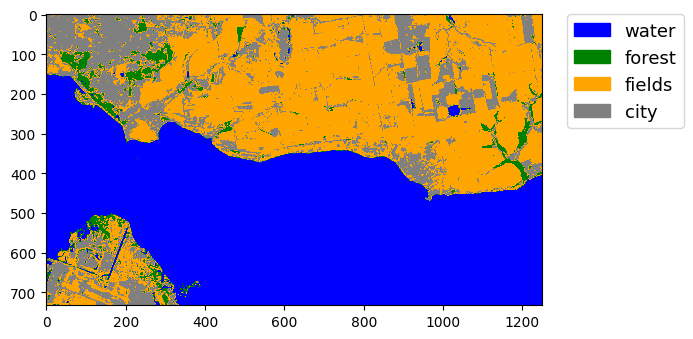

In [122]:
from matplotlib.colors import ListedColormap
import earthpy.plot as ep
import matplotlib.pyplot as plt

im = plt.imshow(image_1_multi_preds_img,
           vmin=1,vmax=6,
               cmap=ListedColormap(['blue', 'green', 'orange', 'grey', 'yellow','brown']))
ep.draw_legend(im_ax = im, titles = ["water","forest","fields","city"])


plt.show()